In [ ]:
import pandas as pd

# Define the file paths
cnv_file_path = '/content/GEO_HG_PPI.csv'
metastasis_file_path = '/content/labels_GEO_HG.csv'

# Load the SNP and metastasis datasets
cnv_df = pd.read_csv(cnv_file_path)
metastasis_df = pd.read_csv(metastasis_file_path)

# Transpose the SNP dataframe to turn rows into columns
cnv_df_transposed = cnv_df.T

# Update the columns of the transposed SNP DataFrame to use the last row as column names
cnv_df_transposed.columns = cnv_df_transposed.iloc[-1]
# Drop the last row as it's now redundant
cnv_df_transposed = cnv_df_transposed.iloc[:-1]

# For the metastasis dataframe, transpose it so that sample IDs become the index
metastasis_status = metastasis_df.T
metastasis_status.columns = ['Metastasis']  # Name the metastasis status column

# Join the metastasis status with the transposed SNP dataframe based on sample IDs
cnv_with_metastasis = cnv_df_transposed.join(metastasis_status, how='left')

# Display the last few rows to verify the structure
cnv_with_metastasis.head()


,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,RPLP0,...,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN,Metastasis
GSM177885,14.027973,13.321452,13.383143,13.752067,13.459339,13.672751,13.406419,13.11883,12.833613,13.009293,...,6.038711,6.091257,6.254978,5.998992,6.029053,6.21297,6.104444,5.913941,6.074499,1
GSM177887,13.892742,14.027973,13.431648,13.459339,13.15547,13.254169,13.406419,12.970659,12.889865,12.90684,...,5.954199,6.114698,6.058185,6.137693,6.246585,6.118346,5.98855,6.080971,5.946836,1
GSM177894,14.201369,13.892742,13.340611,13.752067,13.269927,13.238841,13.029795,12.925001,13.04059,13.195257,...,6.149428,6.084118,6.082904,6.074499,6.236203,6.092384,6.060823,6.046823,6.00355,1
GSM177895,14.201369,13.615073,13.269927,13.672751,13.303665,13.254169,13.04059,13.009293,13.107198,12.915989,...,5.99397,6.058948,6.101276,6.007939,6.058948,6.149798,6.094918,6.069102,5.963548,1
GSM177899,14.201369,13.340611,13.321452,13.948924,12.794457,12.961327,12.520043,12.756682,12.749382,12.915989,...,6.167575,6.162198,6.170033,6.127875,6.149798,6.169692,6.051885,6.065562,6.094638,1


In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming 'Metastasis' is your target variable
X = cnv_with_metastasis.drop('Metastasis', axis=1)  # Features
y = cnv_with_metastasis['Metastasis'].astype(int)  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train.columns = X_train.columns.astype(str)

np.bincount(y_train)

# Initialize SMOTE and balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

Before SMOTE: [518 354]
After SMOTE: [518 518]


In [ ]:
import pandas as pd

# Create DataFrames for the resampled data
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote_df = pd.Series(y_train_smote, name='Metastasis')

# Concatenate features and labels into one DataFrame
smote_df = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

# Save the resampled data to CSV
smote_df.to_csv('smote_resampled_data.csv', index=False)


In [ ]:
smote_df.isna().any

In [ ]:
# Perform SMOTE resampling (assuming this part is done and X_train_smote, y_train_smote are obtained)

# Determine the number of synthetic samples generated by SMOTE
num_synthetic_samples = len(X_train_smote) - len(X_train)

# Retain original indices for the original samples
original_indices = X_train.index.tolist()

# Generate new indices for the synthetic samples
new_indices = [f"new_{i}" for i in range(num_synthetic_samples)]

# Combine the original and new indices
combined_indices = original_indices + new_indices



In [ ]:
combined_indices

In [ ]:
# Assuming combined_indices is ready and smote_df is your DataFrame

# Add combined_indices as a column named "sample_id"
smote_df['sample_id'] = combined_indices

# Set "sample_id" as the index
smote_df = smote_df.set_index('sample_id')

# Verify the DataFrame
smote_df.head()  # Display the first few rows to check the new index


<ipython-input-31-f6d52d036037>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  smote_df['sample_id'] = combined_indices


,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,RPLP0,...,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN,Metastasis
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM150978,14.201369,13.752067,13.524566,13.795728,13.459339,13.107198,12.925001,13.061771,13.238841,13.019293,...,6.08714,6.063385,5.913941,6.032803,6.090103,6.061929,6.038711,6.033852,5.921514,0
GSM519159,14.027973,13.795728,13.269927,13.383143,13.36166,13.238841,13.524566,12.915989,13.321452,12.787052,...,6.118346,6.328926,6.101799,6.103404,6.054275,6.197942,6.155185,6.006483,6.340807,0
GSM150984,13.711606,13.524566,13.431648,13.615073,13.303665,13.224023,13.195257,13.340611,12.881567,12.809869,...,6.178245,6.150776,6.088965,6.08714,6.171412,6.101276,6.099649,6.048492,6.122021,0
GSM447206,12.671026,11.174998,12.642607,13.095805,13.051213,13.752067,13.269927,12.787052,12.970659,12.486522,...,6.218246,6.135185,6.219882,6.061189,6.126557,6.046823,6.271816,6.080971,6.169015,1
GSM178025,13.892742,13.795728,13.286573,13.524566,13.672751,13.459339,12.999661,13.072628,12.691979,13.303665,...,6.127875,6.195223,6.212699,6.115426,6.272472,6.222049,6.051885,5.957399,6.02242,1


In [ ]:
smote_df

,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,RPLP0,...,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN,Metastasis
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM150978,14.201369,13.752067,13.524566,13.795728,13.459339,13.107198,12.925001,13.061771,13.238841,13.019293,...,6.08714,6.063385,5.913941,6.032803,6.090103,6.061929,6.038711,6.033852,5.921514,0
GSM519159,14.027973,13.795728,13.269927,13.383143,13.36166,13.238841,13.524566,12.915989,13.321452,12.787052,...,6.118346,6.328926,6.101799,6.103404,6.054275,6.197942,6.155185,6.006483,6.340807,0
GSM150984,13.711606,13.524566,13.431648,13.615073,13.303665,13.224023,13.195257,13.340611,12.881567,12.809869,...,6.178245,6.150776,6.088965,6.08714,6.171412,6.101276,6.099649,6.048492,6.122021,0
GSM447206,12.671026,11.174998,12.642607,13.095805,13.051213,13.752067,13.269927,12.787052,12.970659,12.486522,...,6.218246,6.135185,6.219882,6.061189,6.126557,6.046823,6.271816,6.080971,6.169015,1
GSM178025,13.892742,13.795728,13.286573,13.524566,13.672751,13.459339,12.999661,13.072628,12.691979,13.303665,...,6.127875,6.195223,6.212699,6.115426,6.272472,6.222049,6.051885,5.957399,6.02242,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
new_159,13.425732,13.810145,13.515962,12.881548,13.269927,13.338537,13.610503,12.878829,12.701389,13.220672,...,6.145847,6.060075,6.137298,6.046933,6.168569,5.966103,5.866496,6.023034,6.042485,1
new_160,13.81925,13.572514,13.108052,13.203055,13.861249,13.226159,13.864209,12.802188,12.961331,12.719662,...,6.085329,6.330413,6.082475,6.097868,6.068307,6.198693,6.093227,6.023098,5.991813,1
new_161,13.545958,13.948924,13.29625,13.201269,13.152438,13.137942,13.344804,12.727683,13.154494,12.840994,...,6.139522,6.186953,6.133035,6.181014,6.065152,6.177096,6.093352,5.991725,5.992087,1


In [ ]:
# Split the DataFrame into SNP data and metastasis labels
snp_data = smote_df.drop('Metastasis', axis=1)  # SNP data without the 'Metastasis' column
metastasis_labels = smote_df[['Metastasis']]  # DataFrame with only the 'Metastasis' column

# Transpose the SNP data to get genes as columns and sample IDs as rows
snp_data_transposed = snp_data.T




In [ ]:
# Transpose the metastasis_labels DataFrame
metastasis_labels_transposed = metastasis_labels.T



In [ ]:
metastasis_labels_transposed

sample_id,GSM150978,GSM519159,GSM150984,GSM447206,GSM178025,GSM151005,GSM519203,GSM282417,GSM615180,GSM50037,...,new_154,new_155,new_156,new_157,new_158,new_159,new_160,new_161,new_162,new_163
Metastasis,0,0,0,1,1,0,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Reset the index to turn it into a regular column
snp_data_transposed_reset = snp_data_transposed.reset_index()

# Rename the new column to "probe"
snp_data_transposed_reset.rename(columns={'index': 'probe'}, inplace=True)

# Get the list of all columns, move 'probe' to the end
columns = list(snp_data_transposed_reset.columns)
columns.append(columns.pop(columns.index('probe')))  # Move 'probe' to the end

# Reorder the DataFrame using the new column order
snp_data_transposed_final = snp_data_transposed_reset[columns]

# Display the updated DataFrame
snp_data_transposed_final


sample_id,GSM150978,GSM519159,GSM150984,GSM447206,GSM178025,GSM151005,GSM519203,GSM282417,GSM615180,GSM50037,...,new_155,new_156,new_157,new_158,new_159,new_160,new_161,new_162,new_163,probe
0,14.201369,14.027973,13.711606,12.671026,13.892742,14.027973,13.711606,13.752067,13.948924,13.948924,...,13.297768,13.896208,13.766078,13.563829,13.425732,13.81925,13.545958,13.754855,14.02566,RPL41
1,13.752067,13.795728,13.524566,11.174998,13.795728,13.948924,13.841218,13.615073,14.027973,13.406419,...,13.455268,14.004697,13.728066,13.615073,13.810145,13.572514,13.948924,13.892742,14.078066,EEF1A1
2,13.524566,13.269927,13.431648,12.642607,13.286573,13.524566,13.563829,13.36166,13.524566,13.795728,...,13.386564,13.26455,13.345209,13.259053,13.515962,13.108052,13.29625,13.641435,13.545514,TPT1
3,13.795728,13.383143,13.615073,13.095805,13.524566,13.672751,12.925001,13.321452,13.168061,13.209737,...,13.15547,13.542471,13.314363,13.153854,12.881548,13.203055,13.201269,13.924337,13.19989,RPL23A
4,13.459339,13.36166,13.303665,13.051213,13.672751,13.072628,13.459339,13.142948,13.130437,13.095805,...,13.137693,13.089175,13.239327,12.76213,13.269927,13.861249,13.152438,13.097068,13.58142,UBC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883,6.090103,6.054275,6.171412,6.126557,6.272472,6.080971,5.966312,6.064087,6.307964,6.109799,...,6.196631,6.037997,6.191904,6.093036,6.168569,6.068307,6.065152,6.190553,6.152307,POU1F1
6884,6.061929,6.197942,6.101276,6.046823,6.222049,6.064087,5.984749,6.032803,6.053485,5.99397,...,5.945553,6.277359,6.032254,6.014195,5.966103,6.198693,6.177096,6.070433,5.955138,SLC22A3
6885,6.038711,6.155185,6.099649,6.271816,6.051885,6.014619,6.161841,6.069783,6.126104,5.942645,...,6.22089,6.090481,6.112873,6.041562,5.866496,6.093227,6.093352,6.153479,5.999477,RAG2
6886,6.033852,6.006483,6.048492,6.080971,5.957399,5.954199,6.058185,6.063385,5.957399,6.047659,...,6.017361,6.084008,6.048072,6.116765,6.023034,6.023098,5.991725,5.999012,6.030022,SI


In [ ]:
# Save the SNP data and metastasis labels to CSV files
snp_data_transposed_final.to_csv('GEO_HG_PPI_converted.csv')
metastasis_labels_transposed.to_csv('labels_GEO_HG_converted.csv')

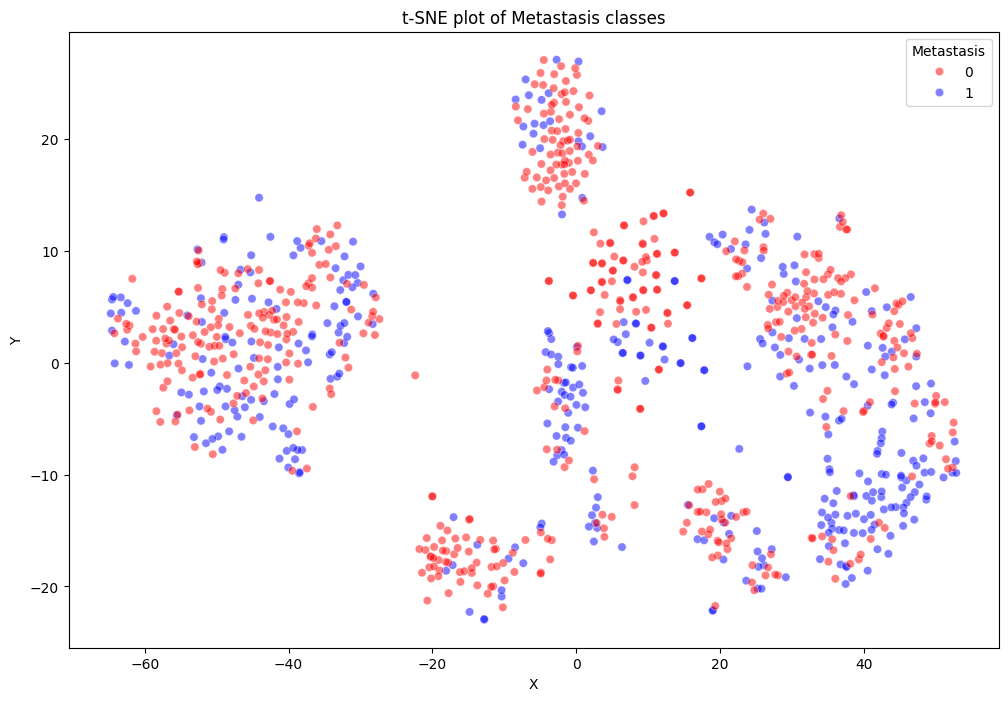

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Since you're using smote_df directly, there's no need to load the dataset from a CSV file
# data = pd.read_csv('/content/smote_resampled_data.csv') # This line is not needed

# Selecting features and the target variable from smote_df
X = cnv_with_metastasis.drop('Metastasis', axis=1)
y = cnv_with_metastasis['Metastasis']

# Initializing t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Transforming the data
X_tsne = tsne.fit_transform(X)

# Creating a DataFrame for plotting
tsne_df = pd.DataFrame({'X': X_tsne[:, 0], 'Y': X_tsne[:, 1], 'Metastasis': y})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Metastasis', data=tsne_df, palette=['red', 'blue'], alpha=0.5)
plt.title('t-SNE plot of Metastasis classes original')
plt.show()


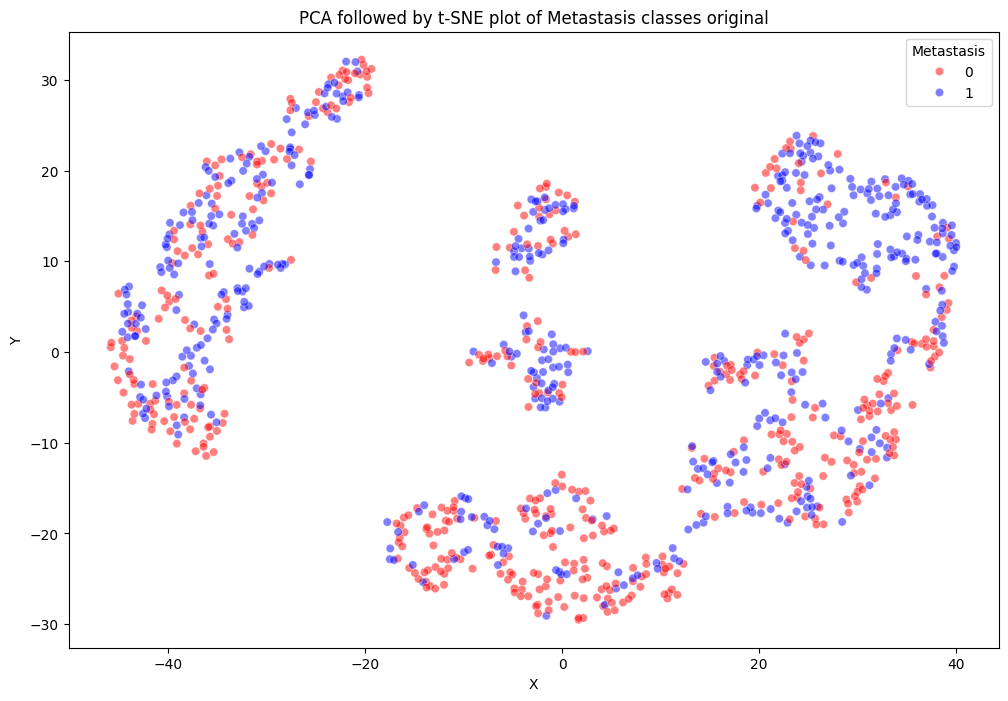

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features and the target variable from smote_df
X = smote_df.drop('Metastasis', axis=1)
y = smote_df['Metastasis']

# Initializing PCA
# You can adjust n_components based on your dataset and how much variance you want to retain
pca = PCA(n_components=2)  # For example, reduce to 50 dimensions

# Applying PCA
X_pca = pca.fit_transform(X)

# Initializing t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Applying t-SNE on the PCA-transformed data
X_tsne = tsne.fit_transform(X_pca)

# Creating a DataFrame for plotting
tsne_df = pd.DataFrame({'X': X_tsne[:, 0], 'Y': X_tsne[:, 1], 'Metastasis': y})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Metastasis', data=tsne_df, palette=['red', 'blue'], alpha=0.5)
plt.title('PCA followed by t-SNE plot of Metastasis classes original')
plt.show()


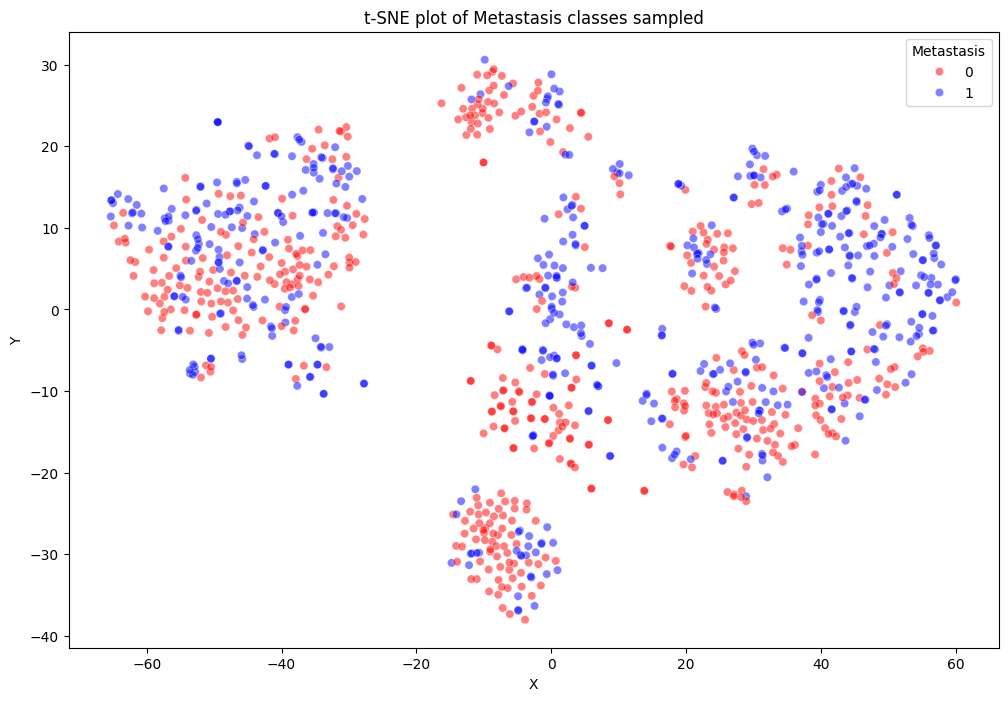

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Since you're using smote_df directly, there's no need to load the dataset from a CSV file
# data = pd.read_csv('/content/smote_resampled_data.csv') # This line is not needed

# Selecting features and the target variable from smote_df
X = smote_df.drop('Metastasis', axis=1)
y = smote_df['Metastasis']

# Initializing t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Transforming the data
X_tsne = tsne.fit_transform(X)

# Creating a DataFrame for plotting
tsne_df = pd.DataFrame({'X': X_tsne[:, 0], 'Y': X_tsne[:, 1], 'Metastasis': y})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Metastasis', data=tsne_df, palette=['red', 'blue'], alpha=0.5)
plt.title('t-SNE plot of Metastasis classes sampled')
plt.show()


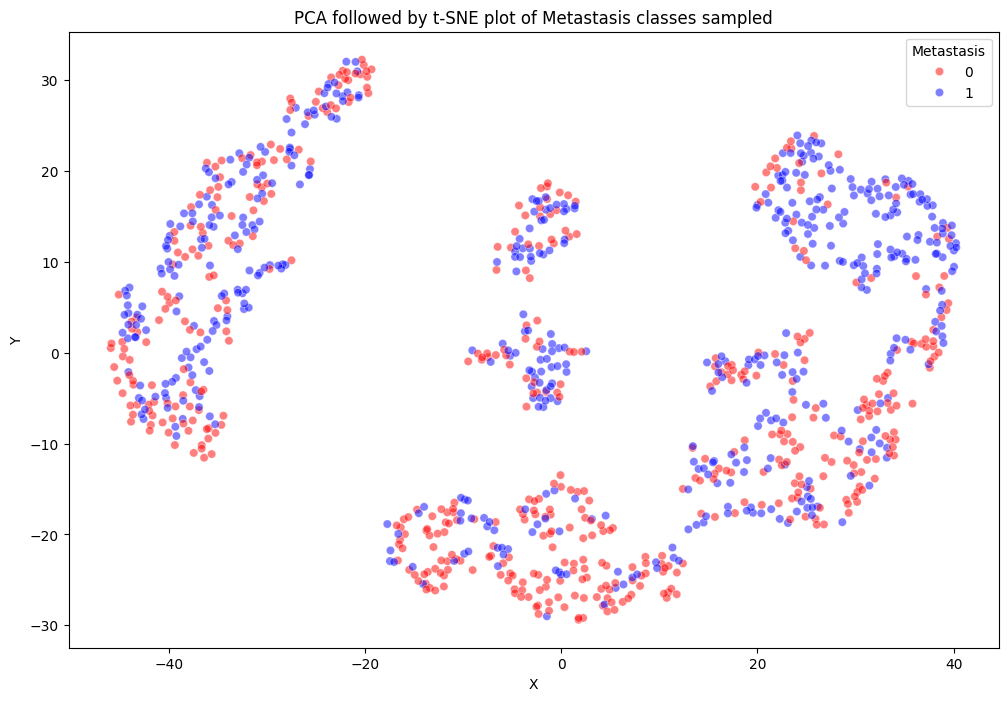

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features and the target variable from smote_df
X = smote_df.drop('Metastasis', axis=1)
y = smote_df['Metastasis']

# Initializing PCA
# You can adjust n_components based on your dataset and how much variance you want to retain
pca = PCA(n_components=2)  # For example, reduce to 50 dimensions

# Applying PCA
X_pca = pca.fit_transform(X)

# Initializing t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Applying t-SNE on the PCA-transformed data
X_tsne = tsne.fit_transform(X_pca)

# Creating a DataFrame for plotting
tsne_df = pd.DataFrame({'X': X_tsne[:, 0], 'Y': X_tsne[:, 1], 'Metastasis': y})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Metastasis', data=tsne_df, palette=['red', 'blue'], alpha=0.5)
plt.title('PCA followed by t-SNE plot of Metastasis classes sampled')
plt.show()
